In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('ggplot')

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
bank_df = pd.read_csv("bank.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = bank_df.shape[0]
num_cols = bank_df.shape[1]

print(f"Tập dữ liệu có {num_rows} dòng")
print(f"Tập dữ liệu có {num_cols} cột")

Tập dữ liệu có 11162 dòng
Tập dữ liệu có 17 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo như mô tả của tác giả cũng như quan sát về tập dữ liệu thì mỗi dòng cho biết thông tin của một khách hàng, lần liên lạc cuối cùng đối với khách hàng đó trong chiến dịch và kết quả người đó có đăng ký tiền gửi có kỳ hạn hay không.
- Không có dòng nào khác với các dòng còn lại.

### Dữ liệu có các dòng bị lặp không?

In [4]:
bank_df.duplicated().sum()

0

Không có các dòng bị lặp trong tập dữ liệu.

### Mỗi cột có ý nghĩa gì?

Mô tả về các cột trong tập dữ liệu `bank.csv` theo `UCI Machine Learning Repository`:
- Thông tin khách hàng:
    - **age**: độ tuổi (numeric)
    - **job**: loại công việc (categorical: 'admin.','blue\-collar','entrepreneur','housemaid','management','retired','services','student','technician','unemployed', 'self-employed', 'unknown')
    - **marital**: tình trạng hôn nhân (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - **education**: trình độ học vấn (categorical: primary, secondary, tertiary and unknown)
    - **default**: có nợ xấu không (categorical: 'no','yes','unknown')
    - **housing**: có khoản nợ vay mua nhà không? (categorical: 'no','yes','unknown')
    - **loan**: có khoản vay cá nhân không (numeric: 'no','yes','unknown')
    - **balance**: số dư cá nhân.
- Lần liên lạc cuối cùng trong chiến dịch:
    - **contact**: cách thức liên lạc (categorical: 'cellular','telephone')
    - **month**: tháng liên lạc gần đây nhất (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - **day**: ngày liên lạc gần đây của tháng (numeric)
    - **duration**: thời lượng liên hệ gần nhất, tính bằng giây (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- Các thông tin còn lại:
    - **campaign**: số lượng địa chỉ liên hệ được thực hiện trong chiến dịch này và cho khách hàng này (numeric, bao gồm cả lần liên hệ cuối cùng)
    - **pdays**: số ngày trôi qua sau lần cuối cùng liên lạc với khách hàng trong chiến dịch trước (numeric; -1 means client was not previously contacted)
    - **previous**: số lượng liên hệ được thực hiện trước chiến dịch này đối với khách hàng này (numeric)
    - **poutcome**: kết quả tiếp thị trước đó với khách hàng này (categorical: 'failure','nonexistent','success')
    - **deposit**: khách hàng có đăng ký gửi tiền không (binary: 'yes','no')

### Dữ liệu có bị thiếu hay không?

Theo flow của một bài HW của thầy thì phần kiểm tra dữ liệu có bị thiếu hay không thường nằm trước phần ý nghĩa của mỗi cột đúng không ạ? Nhưng trong bài này em xin phép hoán đổi thứ tự hai phần này với lí do bởi vì trong phần mô tả ý nghĩa của các cột thì các cột dữ liệu có dạng `categorical` sẽ có các giá trị `unknown` (giá trị thiếu) do đó muốn kiểm tra liệu rằng dữ liệu có bị thiếu hay không thì phải chuyển giá trị `unknown` thành các giá trị `NaN` trước !!!

In [5]:
bank_df.replace("unknown", np.nan, inplace=True)
bank_df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Như thầy đã thấy, nếu như em làm bước này trước thì rõ ràng đã bỏ sót 1 lượng lớn các giá trị bị thiếu rồi đúng không ạ :<. Hiện tại có 4 cột dữ liệu bị thiếu là `job`, `education`, `contact` và `poutcome`, em sẽ chưa xử lý chúng ngay bây giờ...

Trong số các cột bị thiếu dữ liệu trên, cột poutcome thiếu quá nhiều dữ liệu (74.59%) do đó em sẽ loại bỏ cột này ra khỏi dữ liệu

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
col_dtypes = bank_df.dtypes
col_dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Có thể thấy đa phần các cột đều có kiểu dữ liệu phù hợp rồi tuy nhiên đối với cột `month` thay vì có kiểu `object` (jan, feb, mar, ...) như hiện tại thì nó nên mang kiểu dữ liệu là `int` (1, 2, 3, ...) hơn để thuận tiện cho việc so sánh, sắp xếp và trực quan hoá dữ liệu hơn! 

### Tiền xử lý cột `month`

Chuyển cột `month` về dạng datetime bằng hàm to_datetime của pandas sau đó lấy ra phần tử `month` bằng `dt.month` để thu được các giá trị được convert về dạng số: jan->1, feb->2, mar->3,...

In [7]:
bank_df['month'] = pd.to_datetime(bank_df['month'], format='%b').dt.month
bank_df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

Cột `month` đã được đưa về dạng số nguyên `int` và các giá trị chuỗi đã được thay thế bằng số nguyên tương ứng.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

- Như đã nói ở trên, tập dữ liệu không có cột nào bị thiếu dữ liệu do đó ở đây, em chỉ xét đến min và max của các cột này.
- Các cột có dạng numeric bao gồm: "age", "balance", "day", "duration", "campaign", "pdays", "previous".

In [8]:
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
numeric_cols = bank_df[num_cols]
miss = numeric_cols.isna().mean() * 100
min_val = numeric_cols.min()
max_val = numeric_cols.max()
nume_col_profiles_df = pd.DataFrame([miss, min_val,max_val], 
                                    columns = num_cols,
                                    index = ["missing_ratio", "min", "max"])
nume_col_profiles_df

,age,balance,day,duration,campaign,pdays,previous
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,18.0,-6847.0,1.0,2.0,1.0,-1.0,0.0
max,95.0,81204.0,31.0,3881.0,63.0,854.0,58.0


- Khoan khoan, hình như là có khá nhiều điểm bất thường trong các giá trị min/max của các cột numeric:
    - Ở cột `age`, người khách hàng lớn tuổi nhất được marketing về dịch vụ tiền gửi có kỳ hạn là 95 ^^, giả sử họ đồng ý đăng ký gửi tiền có kỳ hạn, liệu họ có còn sống đến lúc nhận lại được số tiền hay không ?
    - Ở cột `balance`, ngân hàng thậm chí marketing với cả những khách hàng hiện có số tiền trong tài khoản ở mức âm, có lẽ ở những trường hợp này thì tỉ lệ thất bại khá cao :<
    - Ở cột `duration`, giá trị `min = 2` có nghĩa là người tư vấn còn chưa kịp giới thiệu bản thân thì đã bị cúp máy rồi, khá giống với các trường hợp telesale ở Việt Nam !
    - Ở cột `campaign` và `previous`, có khách hàng thậm chí được liên lạc đến `63` và `58` lần trong 1 chiến dịch, đây là những khách hàng tiềm năng chăng ?

- Hãy cùng nhau nhìn phân bổ dữ liệu thông qua biểu đồ trực quan

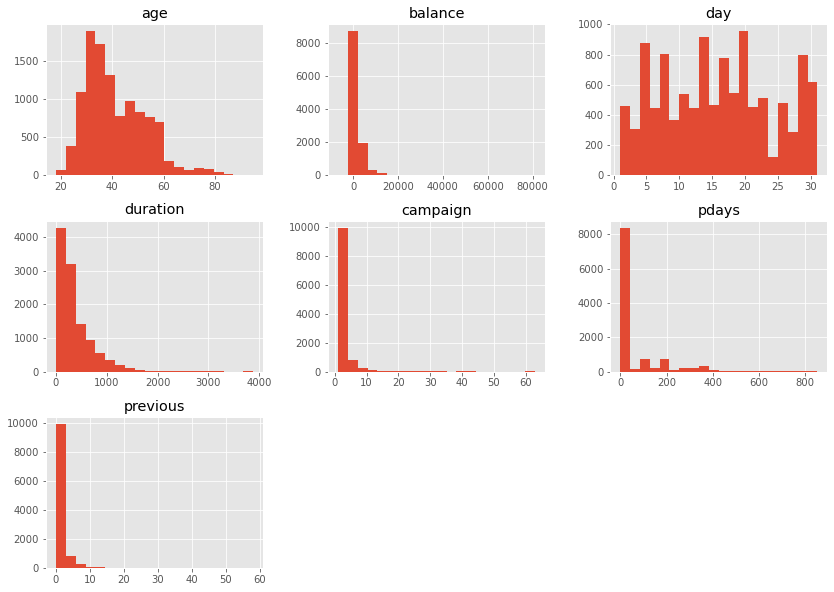

In [9]:
numeric_cols.hist(bins=20, figsize=(14,10))
plt.show()

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

- Tập dữ liệu có các cột categorical là "job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome" và "deposit"
- Với mỗi cột categorical, bởi vì đã nói ở trên là không có cột nào bị thiếu dữ liệu do đó em sẽ đếm số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu).
- Kết quả em sẽ lưu vào dataframe `cate_col_distribution`.

In [10]:
cate_cols = ["job", "marital", "education", "default", "housing", 
             "loan", "contact", "poutcome", "deposit"]
categorical_cols = bank_df[cate_cols]

miss = categorical_cols.isna().mean() * 100
num_diff = categorical_cols.nunique()
diff = categorical_cols.apply(lambda x: x.dropna().unique())

cate_col_profiles_df = pd.DataFrame([miss, num_diff, diff], 
                                    columns = cate_cols,
                                    index = ["missing ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df.T

,missing ratio,num_diff_vals,diff_vals
job,0.627128,11,"[admin., technician, services, management, ret..."
marital,0.0,3,"[married, single, divorced]"
education,4.452607,3,"[secondary, tertiary, primary]"
default,0.0,2,"[no, yes]"
housing,0.0,2,"[yes, no]"
loan,0.0,2,"[no, yes]"
contact,21.017739,2,"[cellular, telephone]"
poutcome,74.592367,3,"[other, failure, success]"
deposit,0.0,2,"[yes, no]"


- Hãy dùng biểu đồ để trực quan hóa rõ hơn về dữ liệu này

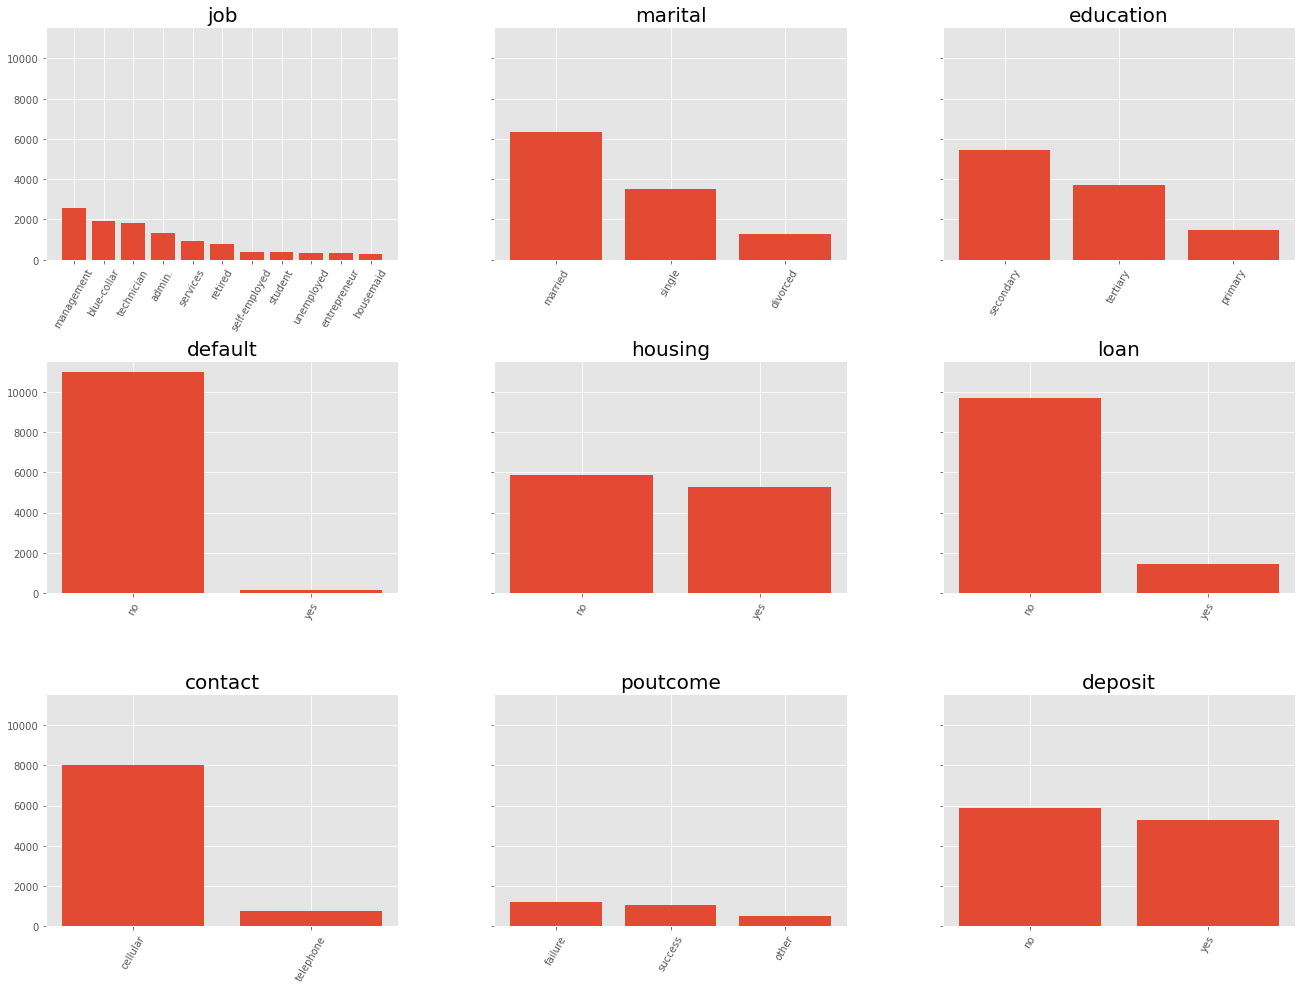

In [11]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=True, figsize=(20, 15))
fig.tight_layout(pad=8.0)

counter = 0
for cat_column in cate_cols:
    value_counts = bank_df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column,fontsize=20)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(60)
    
    counter += 1

plt.show()

### Làm rõ hơn ý nghĩa cột `poutcome`

- Theo như mô tả trên `UCI Machine Learning Repository` thì cột `poutcome` chỉ có 3 giá trị là `failure`, `nonexistent`, `success` tuy nhiên khi kiểm tra lại về `num_diff_vals` của nó thì lại có đến có giá trị `other`.
- Chọn ra các dòng có giá trị `poutcome` là `other` để kiểm tra

In [12]:
bank_df[bank_df["poutcome"] == "other"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,10,519,1,166,1,other,yes
961,34,management,single,tertiary,no,1494,yes,no,cellular,18,11,596,1,182,1,other,yes
968,46,management,married,tertiary,no,0,no,no,cellular,18,11,716,2,110,3,other,yes
977,43,management,married,tertiary,no,1429,yes,no,cellular,19,11,1015,1,198,2,other,yes
982,33,technician,single,tertiary,no,149,yes,no,cellular,19,11,424,2,182,1,other,yes


- Có thể thấy rằng những dòng có giá trị `poutcome` là `other` đều là những khách hàng cũ đã từng được liên lạc trong các chiến dịch marketing trước nhưng có kết quả `poutcome` không rõ ràng.
- `other` ở đây có thể hiểu là 1 khái niệm khá rộng, có thể giải thích theo các hướng như sau: 
    - Đây là những khách hàng đã được tư vấn nhưng họ chưa thể đưa ra quyết định cuối cùng, họ đang lưỡng lự và chưa đưa ra được quyết định cuối cùng.
    - Những khách hàng này có thể là đã chấp nhận mở tài khoản trong các chiến dịch trước rồi nhưng trong khoảng thời gian `pdays` thì họ lại thay đổi quyết định và chưa xác nhận (hay còn gọi là quay xe ^^).
- Với các cách giải thích trên, `other` vẫn đóng vai trò là 1 giá trị hữu ích, có thể giúp chúng ta phân tích sâu hơn và trả lời những câu hỏi liên quan.

---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu, nhóm em nhận thấy có một số câu hỏi có thể được trả lời bằng dữ liệu như sau:
- **Câu hỏi 1**: Quyết định gửi tiền kỳ hạn phụ thuộc vào yếu tố gì và phụ thuộc như thế nào?
    - **Ý Nghĩa**: Để giúp ngân hàng chọn lọc ra những cụm khách hàng nên tập trung tư vấn để đạt kết quả cao nhất cho các chiến dịch kế tiếp.
- **Câu hỏi 2**: Số cuộc liên lạc của khách hàng theo từng tháng là bao nhiêu? Tháng nào có tỉ lệ thành công cao nhất?
    - **Ý Nghĩa**: Thời điểm liên lạc cho khách hàng đóng vai trò khá quan trọng đến việc liệu rằng họ có chấp nhận mở tài khoản tiền gửi có kỳ hạn hay không. Nắm bắt được thời điểm này sẽ giúp ngân hàng tiết kiệm thời gian hơn trong việc liên lạc với khách hàng trong tương lai.
- **Câu hỏi 3**: Tỉ lệ những khách hàng có giá trị `poutcome` là `failure` hoặc `other` mà đồng ý mở tài khoản tiền gửi có kỳ hạn
    - **Ý Nghĩa**: Tập khách hàng này là những khách hàng đã ngân hàng liên lạc trong 1 chiến dịch trước đó nhưng không đồng ý tham gia hoặc còn đang phân vân có nên tham gia hay không, nếu tỉ lệ những khách hàng này đồng ý tham gia với chiến dịch tiền gửi có kỳ hạn lần này (khách hàng có sự thay đổi trong suy nghĩ) ở mức cao thì ngân hàng có thể biết được rằng chất lượng của chiến dịch đã phần nào được cải thiện và đẩy mạnh chiến dịch của mình hơn nữa.
- **Câu hỏi 4**: Liệu chúng ta có thể tận dụng tập dữ liệu để xây dựng mô hình dự đoán cho các chiến dịch lần sau hay không?

### Câu hỏi 1: Quyết định gửi tiền kỳ hạn phụ thuộc vào yếu tố gì và phụ thuộc như thế nào?

- Để trả lời câu hỏi này, em chọn xem xét một số thuộc tính quan trọng như sau:
    - Age
    - Job
    - Martital
    - Education
    - Default
    - Housing
    - Loan

#### 1.1 Độ tuổi ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?
- Ta sẽ xem những người đồng ý gửi kỳ hạn thường tập trung đổ tuổi nào, còn những người không đồng ý gửi kỳ hạn sẽ như thế nào

##### Tiến hành xử lý dữ liệu: 
- Trước tiên ta cần xử lý dữ liệu, chia độ tuổi thành các cụm khác nhau, theo quan sát thì độ tuổi nhỏ nhất là 18 và lớn nhất là 95. Vậy ta sẽ chia thành các cụm *18-30*, *30-60* và *60 trở lên*.

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

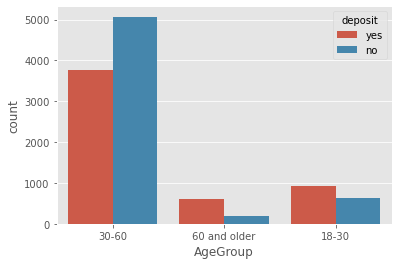

In [13]:
age_df = bank_df[['age','deposit']].copy()
age_df.loc[(age_df['age'] >= 18) & (age_df['age'] < 30), 'AgeGroup'] = '18-30'
age_df.loc[(age_df['age'] >= 30) & (age_df['age'] < 60),'AgeGroup'] = '30-60'
age_df.loc[age_df['age'] >= 60, 'AgeGroup'] = '60 and older'

sns.countplot( x='AgeGroup',hue='deposit',data=age_df[['deposit','AgeGroup']])

<AxesSubplot:xlabel='age'>

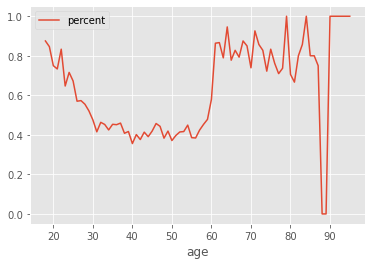

In [14]:
group_deposit_age_df = age_df[['deposit','age']].groupby(['deposit','age']).size().reset_index(name='count')

count_df = group_deposit_age_df.pivot_table('count','age','deposit')
count_df = count_df[['yes','no']]
count_df.replace(np.nan,0,inplace=True)

percent_df = pd.DataFrame()
percent_df['percent'] = count_df['yes']/(count_df['no']+count_df['yes'])
percent_df.plot.line()

- **Nhận xét:**
    - Ta có thể thấy những người từ khoảng độ tuổi từ *nhỏ hơn 30* sẽ có xu hướng gửi kỳ hạn cao.
    - Và khi bước sang độ tuổi từ *30-60* đã có sử chuyển biến, tỷ lệ người gửi kỳ hạn đã giảm đi.
    - Và cuối cùng lại tăng lên ở độ tuổi *60 trở lên*
    - Từ quan sát trên ta có thể thấy chiến dịch marketing thường sẽ hiệu quả với những người trẻ (*nhỏ hơn 30*) hoặc những người lớn tuổi (*lớn hơn 60*), có thể thấy nhóm đối tượng khách hàng từ *30-60* chưa thực sự phản ứng mạnh mẽ với chiến dịch marketing. Điều này có thể vì nguyên nhân chủ quan và khách quan: chiến dịch marketing chưa đánh vào tâm lý của khách hàng ở nhóm tuổi này hoặc vì các lý do khách quan khác.

#### 1.2 Nghề nghiệp ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

- Đầu tiên ta hãy xem phân bổ số người tham gia và số người đồng ý ở từng nghề nghiệp

<AxesSubplot:xlabel='job', ylabel='count'>

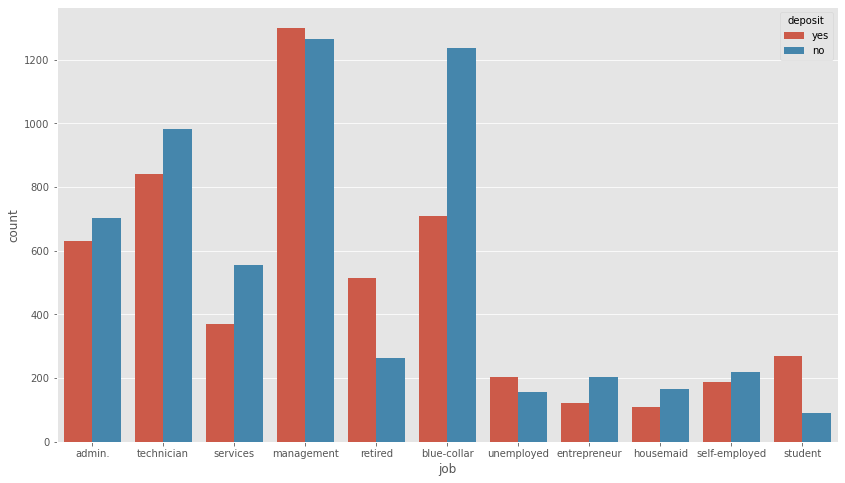

In [15]:
job_df = bank_df[['job','deposit']].copy()

fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(ax=ax, x='job',hue='deposit',data=job_df)

- Tiếp theo hãy nhìn vào biểu đồ tỷ lệ đồng ý tham gia ở mỗi nghề nghiệp

<AxesSubplot:xlabel='Percent', ylabel='Job'>

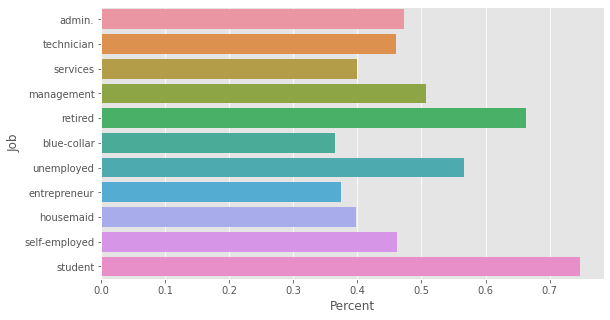

In [16]:
job_list = job_df['job'].unique()
job_percent_yes = dict()
for job in job_list:
    n_yes = job_df.loc[(job_df['job'] == job) & (job_df['deposit'] == 'yes')].shape[0]
    n = job_df.loc[(job_df['job'] == job)].shape[0]
    if n!=0:
        job_percent_yes[job] = n_yes/n

job_percent_yes = pd.DataFrame(job_percent_yes.items(), columns=['Job','Percent'])
plt.figure(figsize=(9,5))
sns.barplot(x='Percent',y='Job',data=job_percent_yes)

- Từ trên ta thấy được những đối tượng dễ tiếp cận là *Student, retired, unemployed* đều có điểm chung là không có sự ổn định trong công việc và cần số tiền của mình sinh lời một cách ổn định. 
- Những đối tượng khó tiếp cận thường là *blue-collar, entrepreneur* đều có thể thấy là những đối tượng có khả năng tiếp cận với các nguồn sinh lợi lớn hơn so với gửi kỳ hạn.

#### 1.3 Tình trạng hôn nhân ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

<AxesSubplot:xlabel='marital', ylabel='count'>

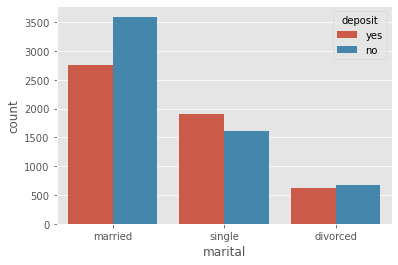

In [17]:
marital_df = bank_df[['marital','deposit']].copy()
marital_df.count()
sns.countplot(x='marital',hue='deposit',data=marital_df)

- Theo kết quả thu được dường như chưa thể tìm ra được ảnh hưởng của hôn nhân đến khả năng tham gia.

#### 1.4 Mức độ giáo dục ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

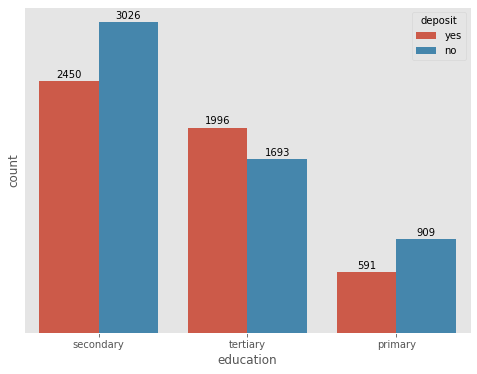

In [18]:
marital_df = bank_df[['education','deposit']].copy()

plt.figure(figsize=(8, 6))
g = sns.countplot(x= 'education', hue = 'deposit', data=marital_df)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

- Ta có thể thấy rằng với nhóm khách hàng có mức độ giáo dục cao trong chiến dịch, họ có xu hướng ổn định hơn 2 nhóm còn lại. 

#### 1.5 Các khoản nợ vay có ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

- Liệu những người có cả bất kỳ khoản nợ nào có tỷ lệ tham gia chênh lệch với những người không có khoảng nợ hay không?
    - Đầu tiên ta sẽ tính tỷ lệ tham gia của những người không có khoản nợ nào, sau đó là tỷ lệ của những người có khoản nợ nói chung.

In [19]:
loan_df = bank_df[['housing','loan','deposit']]
no_loan_df = loan_df.loc[(loan_df['housing'] == 'no') & (loan_df['loan'] == 'no')]


a = no_loan_df.loc[no_loan_df['deposit'] == 'yes'].shape[0]/loan_df.shape[0]

print("Tỷ lệ người không có nợ là: ",round(no_loan_df.shape[0] *100 / loan_df.shape[0],2),"%")
print("Tỷ lệ người không có nợ tham gia là: ",round(a,2),"%")

any_loan_df = loan_df.loc[(loan_df['housing'] == 'yes') | (loan_df['loan'] == 'yes')]

b = any_loan_df.loc[any_loan_df['deposit'] == 'yes'].shape[0]/loan_df.shape[0]

print("Tỷ lệ người có nợ là: ",round(any_loan_df.shape[0] *100 / loan_df.shape[0],2),"%")
print("Tỷ lệ người có nợ tham gia là: ",round(b,2),"%")

Tỷ lệ người không có nợ là:  47.09 %
Tỷ lệ người không có nợ tham gia là:  0.28 %
Tỷ lệ người có nợ là:  52.91 %
Tỷ lệ người có nợ tham gia là:  0.19 %


- Vậy ta có thể thấy có khoản nợ sẽ ảnh hưởng rất nhiều đến với việc tham gia gửi kỳ hạn. 

### Câu hỏi 2: Số cuộc liên lạc của khách hàng theo từng tháng là bao nhiêu? Tháng nào có tỉ lệ thành công cao nhất?

### Tiền xử lý dữ liệu để trả lời câu hỏi

Các bước tiền xử lý dữ liệu cần thiết:
- **Bước 1:** Gom nhóm dữ liệu theo cột month, đồng thời dùng phương thức count() trên thuộc tính `age` để tính số lượng cuộc gọi theo tháng. Vẽ barchart minh hoạ cho `Số cuộc gọi theo tháng của chiến dịch`.
- **Bước 2:** Tính toán tỉ lệ thành công (deposit = yes) trên số cuộc gọi mỗi tháng để tìm ra những tháng có tỉ lệ thành công cao nhất.

#### Code bước 1

In [20]:
month_group = bank_df.groupby(["month"])
month_ct = month_group["age"].count()
month_ct

month
1      344
2      776
3      276
4      923
5     2824
6     1222
7     1514
8     1519
9      319
10     392
11     943
12     110
Name: age, dtype: int64

<AxesSubplot:title={'center':'Số cuộc gọi theo tháng của chiến dịch'}, xlabel='month', ylabel='Số cuộc gọi'>

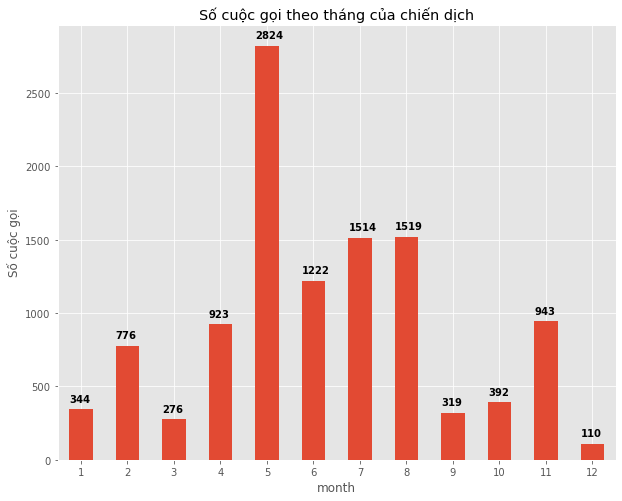

In [21]:
plt.figure(figsize=(10, 8))
plt.ylabel("Số cuộc gọi")
plt.title("Số cuộc gọi theo tháng của chiến dịch")
for i, v in enumerate(month_ct):
    plt.text(i-0.25, v+50, str(v), fontweight='bold')
month_ct.plot(kind='bar', rot=0)

Trong chiến dịch lần này, ngân hàng tập trung liên hệ cho khách hàng rất nhiều trong tháng 5 (2824 cuộc liên lạc) và họ liên lạc cho khách hàng ít nhất vào tháng 12 (110 cuộc gọi). Tuy nhiên chưa chắc gọi nhiều sẽ có tỉ lệ thành công cao do đó cần phải tính tỉ lệ thành công (deposit = yes) trên số cuộc gọi mỗi tháng.

#### Code bước 2

In [22]:
df_g = bank_df.query('deposit == "yes"')
success_ct = df_g.groupby("month").size()
success_rate = round(success_ct / month_ct * 100, 2)
success_rate_df = pd.DataFrame(index = month_ct.index)
success_rate_df["Success Rate (%)"] = success_rate
success_rate_df["Full Rate (%)"] = 100.0
success_rate_df = success_rate_df.reset_index()
success_rate_df

,month,Success Rate (%),Full Rate (%)
0,1,41.28,100.0
1,2,56.83,100.0
2,3,89.86,100.0
3,4,62.51,100.0
4,5,32.75,100.0
5,6,44.68,100.0
6,7,41.41,100.0
7,8,45.29,100.0
8,9,84.33,100.0
9,10,82.40,100.0


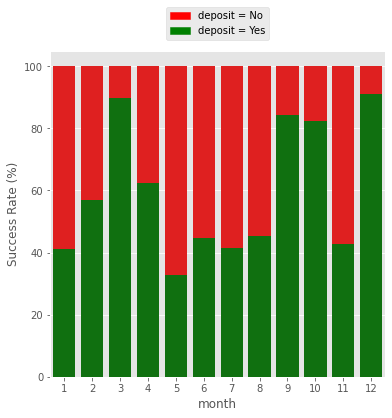

In [23]:
plt.figure(figsize=(6, 6))
bar1 = sns.barplot(x="month",  y="Full Rate (%)", data=success_rate_df, color='red')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="month", y="Success Rate (%)", data=success_rate_df, color='green')

# add legend
top_bar = mpatches.Patch(color='red', label='deposit = No')
bottom_bar = mpatches.Patch(color='green', label='deposit = Yes')
plt.legend(handles=[top_bar, bottom_bar], loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=1)

# show the graph
plt.show()

Theo quan sát từ biểu đồ thì tháng các tháng có tỉ lệ thành công cao nhất là `3, 9, 10, 12`. Mặc dù tháng `5` (2824 cuộc liên lạc) là tháng có số cuộc gọi là lớn nhất nhưng tỉ lệ thành công lại khá thấp, thậm chí là thấp nhất trong 12 tháng. Điều này chứng tỏ rằng ngân hàng đã đầu tư thời gian của mình chưa thật sự phù hợp. Nên tăng số lượng liên lạc trong các tháng `3, 9, 10, 12` lên thì có lẽ hiệu quả của chiến dịch sẽ được cải thiện nhiều hơn.

### Câu hỏi 3: Tỉ lệ những khách hàng có giá trị `poutcome` là `failure` hoặc `other` mà đồng ý mở tài khoản tiền gửi có kỳ hạn

### Tiền xử lý dữ liệu để trả lời câu hỏi

In [24]:
poutcome_df = bank_df[((bank_df["poutcome"] == "failure") | 
                       (bank_df["poutcome"] == "other"))]
poutcome_df.reset_index(inplace=True)
total_case = len(poutcome_df)
depo_group = poutcome_df.groupby("deposit")["index"].count()
percent_accepted = round(depo_group["yes"] / total_case * 100, 2)
percent_denied = 100 - percent_accepted
print(f"Tỉ lệ khách hàng đồng ý mở tài khoản tiền gửi có kỳ hạn là {percent_accepted} %")
print(f"Tỉ lệ khách hàng không đồng ý mở tài khoản tiền gửi có kỳ hạn là {percent_denied} %")

Tỉ lệ khách hàng đồng ý mở tài khoản tiền gửi có kỳ hạn là 52.41 %
Tỉ lệ khách hàng không đồng ý mở tài khoản tiền gửi có kỳ hạn là 47.59 %


<AxesSubplot:title={'center':'Tỉ lệ khách hàng thay đổi suy nghĩ'}, ylabel='None'>

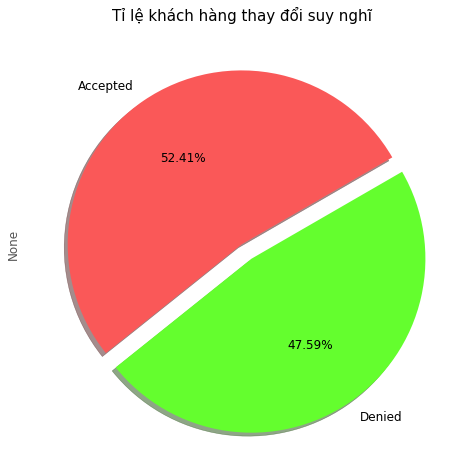

In [25]:
colors = ["#FA5858", "#64FE2E"]
labels ="Accepted", "Denied"
percent = pd.Series([percent_accepted, percent_denied])
plt.figure(figsize=(8, 8))
plt.title('Tỉ lệ khách hàng thay đổi suy nghĩ', fontsize=15)
percent.plot.pie(explode=[0,0.1], autopct='%1.2f%%', shadow=True, colors=colors, 
                 labels=labels, fontsize=12, startangle=30)

Tập khách hàng này là những khách hàng đã ngân hàng liên lạc trong 1 chiến dịch trước đó nhưng không đồng ý tham gia hoặc còn đang phân vân có nên tham gia hay không, theo quan sát thì tỉ lệ khách hàng đồng ý tham gia lần này (thay đổi suy nghĩ) là 52,41%, đây là một con số không quá cao nhưng cho thấy được sự cải thiện của ngân hàng trong chiến dịch lần này. Hơn một nửa số khách hàng đã quyết định thay đổi suy nghĩ và đăng ký tài khoản tiền gửi có kỳ hạn cũng là 1 thành công tương đối và ngân hàng cần phải quan tâm đến tập khách hàng này nhiều hơn nữa nếu muốn chiến dịch thực sự thành công